In [1]:
# Извлечение кадров из видео

import os
import numpy as np
import cv2
from matplotlib import pyplot as plt

try: 
    if not os.path.exists('data_n'): 
        os.makedirs('data_n')  
except OSError: 
    print('Error: Creating directory of data') 

cap = cv2.VideoCapture('steelproduct.mp4')
scale_percent = 25 

length = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
print( length )

i = 1
while (1):
    ret, frame = cap.read()
    if ret == False:
        break;
        
    wi = int(frame.shape[1] * scale_percent / 100)
    he = int(frame.shape[0] * scale_percent / 100)
    dim = (wi, he)
    frame1 = cv2.resize(frame, dim, interpolation = cv2.INTER_AREA) 
    
#     filtered_frame = cv2.medianBlur(frame1, 7)
    name = './data_n/fra' + str(i) +'.jpg'
    cv2.imwrite(name, frame)
    i += 1
    
cap.release()

469


In [ ]:
# Обрезка (опционально)

import numpy as np
import cv2
from matplotlib import pyplot as plt

for i in range(1, 80):
    name = './data_n/fra' + str(i) +'.jpg'
    img = cv2.imread(name)

    plt.imshow(img)
    plt.show()

    img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

    plt.imshow(img_lab)
    plt.show()

cv2.destroyAllWindows()

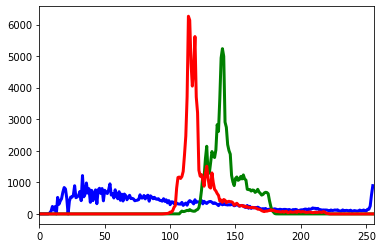

In [9]:
# Классификация по цветам

import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from sklearn.utils import shuffle
from time import time
scale_percent = 50 # percent of original size
n_clusters = 6

name = 'extra_cropped_data/data_proccesed/' + str(1) +'p.jpg'
img = cv2.imread(name)

img_lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
img1 = np.array(img_lab, dtype=np.float64) / 255
w, h, d = original_shape = tuple(img1.shape)

image_array = np.reshape(img1, (w * h, d))
kmeans = KMeans(n_clusters, random_state=0).fit(image_array)
#labels = kmeans.predict(image_array)
#     print(kmeans.cluster_centers_)

n = kmeans.labels_.shape[0]
labels =  kmeans.labels_
image = np.zeros((w, h, d))
label_idx = 0
color = [0, 0, 0]
for i in range(w):
    for j in range(h):
        if(labels[label_idx] == 0):
            color = [255, 0, 0]
        if(labels[label_idx] == 1):
            color = [0, 255, 0]
        if(labels[label_idx] == 2):
            color = [0, 0, 255]
        if(labels[label_idx] == 3):
            color = [0, 255, 255]        
        if(labels[label_idx] == 4):
            color = [255, 255, 0]        
        if(labels[label_idx] == 5):
            color = [255, 255, 255]     
            
        image[i][j][:] = color
        label_idx += 1


cv2.imwrite('clust.jpg', image)

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_lab],[i],None,[256],[0,256])
    plt.plot(histr,color = col, linewidth=3.0)
    plt.xlim([0,256])
plt.show()

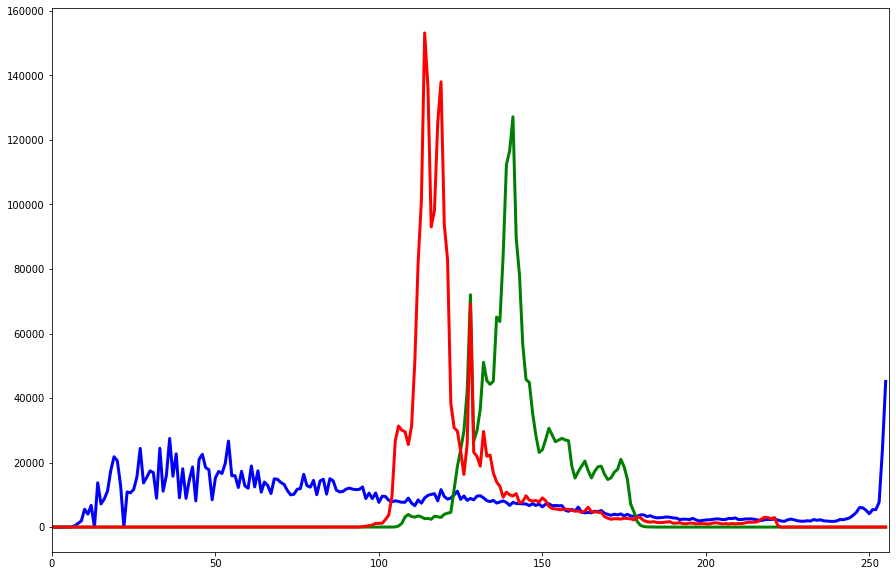

<Figure size 432x288 with 0 Axes>

In [6]:
plt.figure(figsize=(15,10))
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_lab],[i],None,[256],[0,256])
    plt.plot(histr,color = col, linewidth=3.0)
    plt.xlim([0,256])
plt.show()

plt.savefig("hist_extract.png")

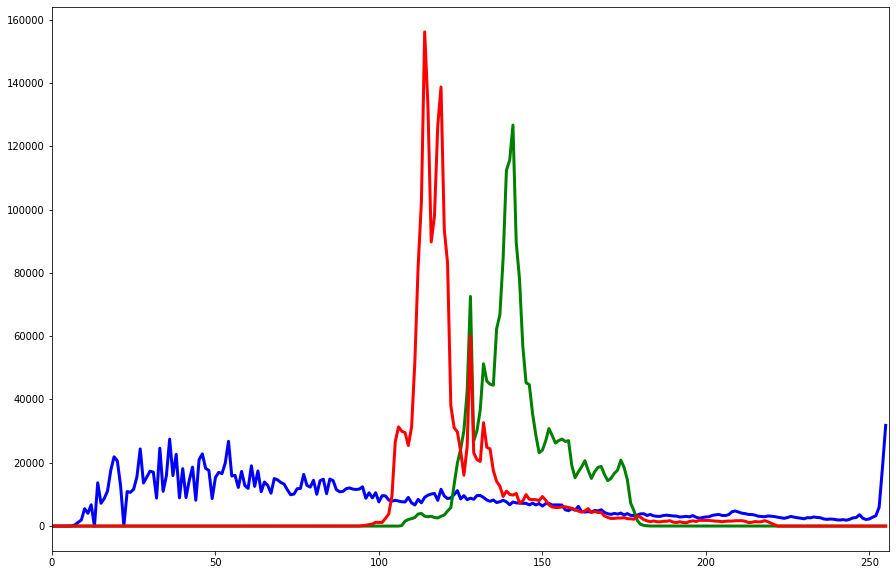

<Figure size 432x288 with 0 Axes>

In [8]:
plt.figure(figsize=(15,10))
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img_lab],[i],None,[256],[0,256])
    plt.plot(histr,color = col, linewidth=3.0)
    plt.xlim([0,256])
plt.show()

plt.savefig("hist_extract.png")